# Project: Hypothesis Testing with Men's and Women's Soccer Matches
![A soccer pitch for an international match.](figures/soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

### Step 1: Importing Necessary Libraries

First, we need to import the necessary libraries for data manipulation and visualization, and statistical analysis.

In [36]:
import pandas as pd
import pingouin as pg
import seaborn as sns

### Step 2: Loading the Data

Next, we load the datasets containing the results of men's and women's international soccer matches.

In [ ]:
women_data = pd.read_csv("data/women_results.csv", parse_dates=["date"])
men_data = pd.read_csv("data/men_results.csv", parse_dates=["date"])

In [38]:
print(women_data.head(), men_data.head())

   Unnamed: 0       date home_team  ... home_score  away_score        tournament
0           0 1969-11-01     Italy  ...          1           0              Euro
1           1 1969-11-01   Denmark  ...          4           3              Euro
2           2 1969-11-02   England  ...          2           0              Euro
3           3 1969-11-02     Italy  ...          3           1              Euro
4           4 1975-08-25  Thailand  ...          3           2  AFC Championship

[5 rows x 7 columns]    Unnamed: 0       date home_team away_team  home_score  away_score tournament
0           0 1872-11-30  Scotland   England           0           0   Friendly
1           1 1873-03-08   England  Scotland           4           2   Friendly
2           2 1874-03-07  Scotland   England           2           1   Friendly
3           3 1875-03-06   England  Scotland           2           2   Friendly
4           4 1876-03-04  Scotland   England           3           0   Friendly


### Step 3: Data Preprocessing

We filter the data to include only official `FIFA World Cup` matches (excluding qualifiers) since `2002-01-01`.

In [39]:
# Filter data for FIFA World Cup matches since 2002-01-01

women_wc_data = women_data[(women_data['tournament'] == 'FIFA World Cup') & (women_data['date'] >= '2002-01-01')]
men_wc_data = men_data[(men_data['tournament'] == 'FIFA World Cup') & (men_data['date'] >= '2002-01-01')]

### Step 4: Calculating Total Goals

We calculate the total number of goals scored in each match for both datasets.

In [40]:
women_wc_data['total_goals'] = women_wc_data['home_score'] + women_wc_data['away_score']
men_wc_data['total_goals'] = men_wc_data['home_score'] + men_wc_data['away_score']

In [41]:
women_wc_data.reset_index(drop=True)
men_wc_data.reset_index(drop=True)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_goals
0,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
1,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
2,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
3,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
4,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1
...,...,...,...,...,...,...,...,...
379,44343,2022-12-10,England,France,1,2,FIFA World Cup,3
380,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,3
381,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup,2
382,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,3


### Step 5: Performing the Hypothesis Test

Given that the groups as independent, we will perform an **unpaired** two sample test. To determine whether to use a parametric or a non-parametric two sample test, we need to check the **sample size** and the **normality of the distribution**.


#### 5.1 Checking the Assumptions 

In [42]:
# First we check the sample size
print(women_data.shape, men_data.shape)

(4884, 7) (44353, 7)


Sample size is large enough

<AxesSubplot: xlabel='total_goals', ylabel='Count'>

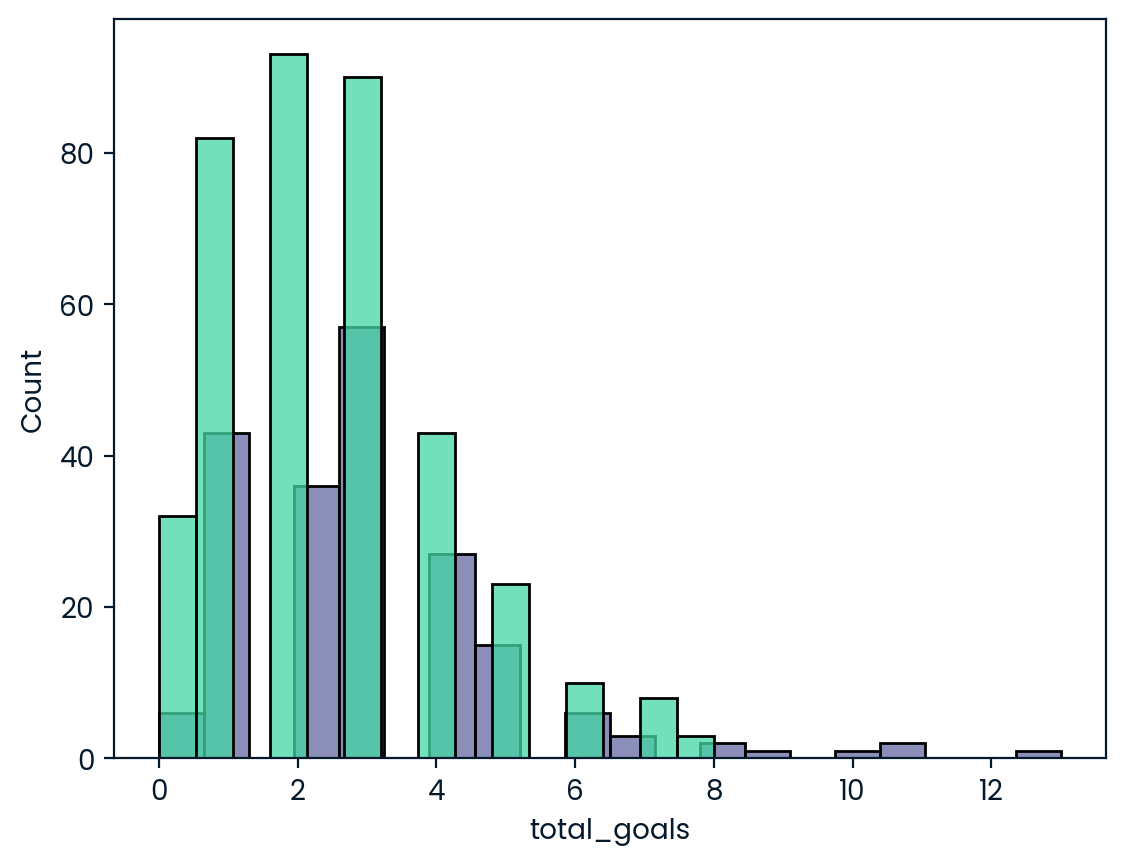

In [43]:
# Then we check the distribution type

import seaborn as sns

sns.histplot(women_wc_data, x="total_goals")
sns.histplot(men_wc_data, x="total_goals")

The distributions do not seem to be normally distributed, the bell curve is not very prominent. In order to confirm this, we will perform a normality test: **Shapiro-Wilk test**.

In [44]:
# Normality test on the women dataset
pg.normality(data=women_wc_data['total_goals'], method='shapiro', alpha=0.05)

,W,pval,normal
total_goals,0.849101,3.890520e-13,False


In [45]:
# Normality test on the men dataset 
pg.normality(data=men_wc_data['total_goals'], method='shapiro', alpha=0.05)

,W,pval,normal
total_goals,0.926649,8.894154e-13,False


The data is not normally distributed. We will peform a non-parametric test: **Mann-Whitney U-Test**

#### 5.2 Mann-Whitney U-Test

In [46]:
result = pg.mwu(x=women_wc_data["total_goals"],
              y=men_wc_data["total_goals"],
              alternative="greater")

### Step 6: Interpreting Results

In [47]:
significance_level = 0.1

In [48]:
p_val = result["p-val"].values[0]
p_val

0.005106609825443641

In [49]:
result_dict = {
    "p_val": p_val,
    "result": "reject" if p_val < significance_level else "fail to reject"
}

In [50]:
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}


We reject H0 in favour of the alternative hypothesis.

## References
Shapiro wilk test: https://www.kaggle.com/discussions/general/432129